# Prediksi Produksi Padi Pulau Sumatra Tahun 2025 By Amelia Evita Alam

Link Dataset : https://www.kaggle.com/datasets/ardikasatria/datasettanamanpadisumatera

### Tujuan Project :
**Untuk Memprediksi produksi padi tahun 2025 di Pulau Sumatera.**

### Dataset :
| No | Nama Variabel       | Tipe Data            | Peran Variabel | Keterangan                                                  |
| -- | ------------------- | -------------------- | -------------- | ----------------------------------------------------------- |
| 1  | Tahun               | Numerik (Integer)    | Fitur (X)      | Menunjukkan tahun pengamatan data produksi padi             |
| 2  | Provinsi            | Kategorikal (String) | Fitur (X)      | Nama provinsi di Pulau Sumatra tempat produksi padi dicatat |
| 3  | Luas Panen (Ha)     | Numerik (Float)      | Fitur (X)      | Luas area panen padi dalam satuan hektar                    |
| 4  | Curah Hujan (mm)    | Numerik (Float)      | Fitur (X)      | Jumlah curah hujan tahunan dalam satuan milimeter           |
| 5  | Suhu Rata-rata (°C) | Numerik (Float)      | Fitur (X)      | Suhu udara rata-rata tahunan dalam derajat Celcius          |
| 6  | Kelembapan (%)      | Numerik (Float)      | Fitur (X)      | Tingkat kelembapan udara rata-rata tahunan dalam persentase |
| 7  | Produksi Padi (Ton) | Numerik (Float)      | **Target (Y)** | Jumlah produksi padi tahunan dalam satuan ton               |


# **1. Data Collection**

Dataset yang digunakan merupakan data produksi padi di Pulau Sumatra yang diperoleh dari Kaggle. Dataset mencakup data tahunan produksi padi per provinsi beserta variabel pendukung seperti luas panen dan faktor iklim.


In [23]:
# Import dan Download the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
padi = pd.read_csv('Padi Sumatra.csv')
padi.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


# **2. Data Understanding**

Tahap ini bertujuan untuk memahami karakteristik dataset,struktur kolom, tipe data, dan potensi permasalahan awal.

In [24]:
padi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [25]:
padi.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


# **3. Data Cleaning**

Tahap ini dilakukan pembersihan data untuk memastikan kualitas data sebelum dianalisis lebih lanjut.

In [26]:
# Cek missing values
padi.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

# 4. Exploratory Data Analysis (EDA)

Tahap eksplorasi data dilakukan untuk melihat pola, tren, dan hubungan antar variabel

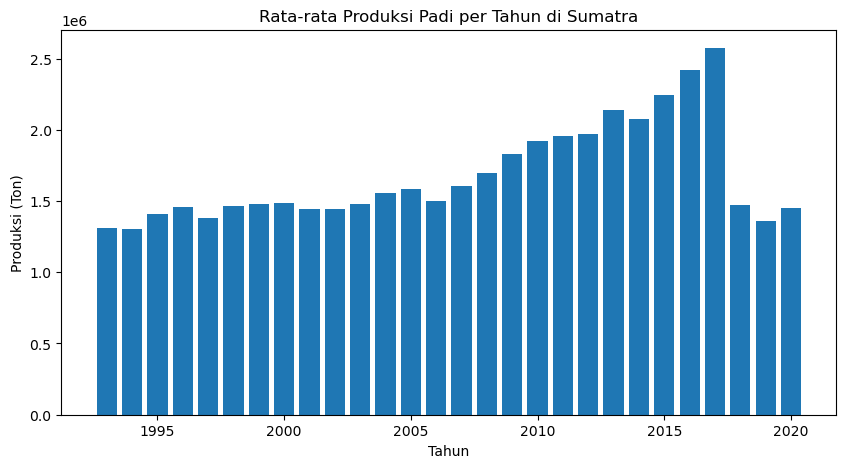

In [27]:
# 4.1 Tren Produksi Padi di Sumatra

avg_year = padi.groupby('Tahun')['Produksi'].mean()
plt.figure(figsize=(10,5))
plt.bar(avg_year.index, avg_year.values)
plt.title('Rata-rata Produksi Padi per Tahun di Sumatra')
plt.xlabel('Tahun')
plt.ylabel('Produksi (Ton)')
plt.show()

# INSIGHT GRAFIK

Berdasarkan grafik rata-rata produksi padi per tahun di Pulau Sumatra, terlihat adanya tren peningkatan produksi dari tahun 1993 hingga mencapai puncaknya sekitar tahun 2017. Namun, terjadi penurunan produksi yang signifikan pada tahun 2018–2019 sebelum kembali stabil pada tahun 2020

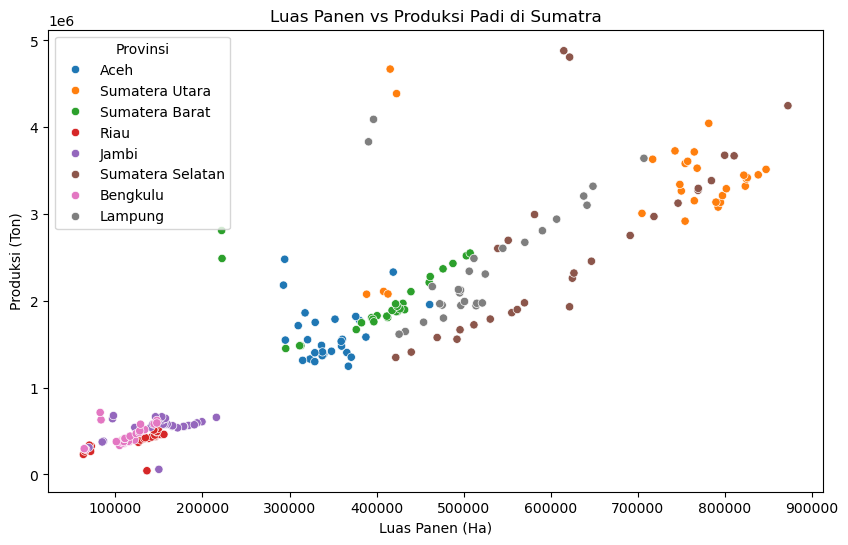

Korelasi antara Luas Panen dan Produksi: 0.9056221550687519


In [28]:
# Hubungan Luas Panen dan Produksi

plt.figure(figsize=(10,6))
sns.scatterplot(data=padi, x='Luas Panen', y='Produksi', hue='Provinsi')
plt.title('Luas Panen vs Produksi Padi di Sumatra')
plt.xlabel('Luas Panen (Ha)')
plt.ylabel('Produksi (Ton)')
plt.show()

# Korelasi antara Luas Panen dan Produksi
correlation = padi['Luas Panen'].corr(padi['Produksi'])
print(f'Korelasi antara Luas Panen dan Produksi: {correlation}')

# INSIGHT GRAFIK

Hasil analisis menunjukkan adanya hubungan positif yang sangat kuat antara luas panen dan produksi padi di Pulau Sumatra, dengan nilai koefisien korelasi sebesar 0,91. Hal ini mengindikasikan bahwa luas panen merupakan faktor dominan yang memengaruhi besarnya produksi padi.

# **5. Feature Engineering**

Tahap ini bertujuan untuk meningkatkan performa model dengan membuat dan menyiapkan fitur yang relevan

In [29]:
# 5.1 Encoding Variabel Kategorikal

padi = pd.get_dummies(padi, columns = ['Provinsi'], drop_first = True)

In [30]:
# 5.2 Pemilihan Fitur dan Target

target = 'Produksi'
features = [col for col in padi.columns if col not in ['Produksi']]

# **6. Data Splitting (Time-Based Split)**

Pembagian data dilakukan berdasarkan tahun untuk menghindari data leakage.

In [31]:
train = padi[padi['Tahun'] <= 2018]
test = padi[(padi['Tahun'] > 2018) & (padi['Tahun'] <= 2020)]


X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# **7. Modelling**


In [32]:
# 7.1 Linear Regression Model (Baseline Model)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# untuk menyimpan hasil prediksi
lr = LinearRegression()
lr.fit(X_train, y_train)

# evaluasi model
y_pred_lr = lr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('R2:', r2_score(y_test, y_pred_lr))

MAE: 631382.7958969506
R2: 0.4614953823911071


In [33]:
# 7.2  Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('R2:', r2_score(y_test, y_pred_rf))

MAE: 335231.5250531262
R2: 0.7775133368146618


| Model             | MAE     | R²   |
| ----------------- | ------- | ---- |
| Linear Regression | 631382.80| 0.46 |
| Random Forest     | 335231.52 | 0.77 |

Note:
- Semakin Kecil MAE --> Semakin Akurat
- R^2 makin mendekati 1 --> Semakin bagus
- Random Forest jauh lebih baik karena bisa mengurangi eror hampir 300 ribu ton.

Maka, **Random Forest** secara signifikan **lebih unggul** dibandingkan Linear Regression, baik dari sisi akurasi (MAE lebih kecil) maupun kemampuan menjelaskan data (R² lebih besar).


# **8. Hyperparameter Tuning**

In [34]:
from sklearn.model_selection import GridSearchCV


param_grid = {
'n_estimators': [100, 200],
'max_depth': [None, 5, 10],
'min_samples_leaf': [1, 3, 5]
}


grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
scoring='neg_mean_absolute_error', cv=3)


grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

# **9. Evaluasi Model**

In [35]:
y_pred_best = best_rf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_best))
print('R2:', r2_score(y_test, y_pred_best))

MAE: 490910.19830846216
R2: 0.5767089187516135


Evaluasi model Random Forest terbaik pada data uji setelah dituning menghasilkan nilai MAE sebesar 490.910 dan nilai R² sebesar 0,58. Hal ini menunjukkan bahwa model mampu menjelaskan sekitar 58% variasi produksi padi. Perbedaan performa dibandingkan model awal mengindikasikan adanya trade-off antara tuning hyperparameter dan kemampuan generalisasi model.

**Kenapa setelah dituning malah turun?**

--> Karena tuning dilakukan menggunakan cross-validation pada data latih, sedangkan evaluasi akhir dilakukan pada data uji yang terpisah. Hal ini menunjukkan bahwa model awal mungkin sedikit overfitting terhadap data uji.

# **10. Prediksi Produksi Padi Tahun 2025**

In [36]:
data_2025 = X_test.mean().to_frame().T
data_2025['Tahun'] = 2025


pred_2025 = best_rf.predict(data_2025)
pred_2025

array([2414821.09468119])

# **11. Grafik Actual VS Prediksi**

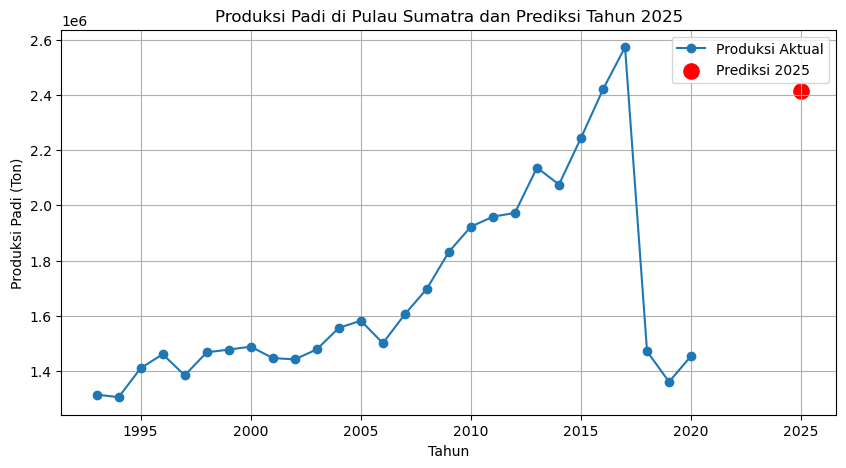

In [37]:
import matplotlib.pyplot as plt

# Data historis (rata-rata per tahun)
produksi_per_tahun = (
    padi.groupby('Tahun')['Produksi']
        .mean()
        .reset_index()
)

# Tambahkan data prediksi 2025
tahun_2025 = 2025
produksi_2025 = pred_2025[0]

# Plot
plt.figure(figsize=(10,5))

# Plot data aktual
plt.plot(
    produksi_per_tahun['Tahun'],
    produksi_per_tahun['Produksi'],
    marker='o',
    label='Produksi Aktual'
)

# Plot prediksi 2025
plt.scatter(
    tahun_2025,
    produksi_2025,
    color='red',
    s=120,
    label='Prediksi 2025'
)

plt.title('Produksi Padi di Pulau Sumatra dan Prediksi Tahun 2025')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.legend()
plt.grid(True)
plt.show()


# **11. Kesimpulan**

Berdasarkan hasil pemodelan, Random Forest dengan hyperparameter tuning memberikan performa terbaik dalam memprediksi produksi padi di Pulau Sumatra. Hasil prediksi menunjukkan bahwa produksi padi di Pulau Sumatra pada tahun 2025 diperkirakan mencapai sekitar 2,42 juta ton, dengan asumsi kondisi iklim dan luas panen relatif stabil seperti pada tahun-tahun sebelumnya.